In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ranking-sports-by-skill-requirement/toughestsport.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import pi

In [3]:
df = pd.read_csv('/kaggle/input/ranking-sports-by-skill-requirement/toughestsport.csv')

In [4]:
df.head()

,SPORT,Endurance,Strength,Power,Speed,Agility,Flexibility,Nerve,Durability,Hand-eye coordination,Analytical Aptitude,Total,Rank
0,Boxing,8.63,8.13,8.63,6.38,6.25,4.38,8.88,8.50,7.00,5.63,72.375,1
1,Ice Hockey,7.25,7.13,7.88,7.75,7.63,4.88,6.00,8.25,7.50,7.50,71.750,2
2,Football,5.38,8.63,8.13,7.13,6.38,4.38,7.25,8.50,5.50,7.13,68.375,3
3,Basketball,7.38,6.25,6.50,7.25,8.13,5.63,4.13,7.75,7.50,7.38,67.875,4
4,Wrestling,6.63,8.38,7.13,5.13,6.38,7.50,5.00,6.75,4.25,6.38,63.500,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SPORT                  60 non-null     object 
 1   Endurance              60 non-null     float64
 2   Strength               60 non-null     float64
 3   Power                  60 non-null     float64
 4   Speed                  60 non-null     float64
 5   Agility                60 non-null     float64
 6   Flexibility            60 non-null     float64
 7   Nerve                  60 non-null     float64
 8   Durability             60 non-null     float64
 9   Hand-eye coordination  60 non-null     float64
 10  Analytical Aptitude    60 non-null     float64
 11  Total                  60 non-null     float64
 12  Rank                   60 non-null     int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 6.2+ KB


In [6]:
df.isnull().sum()

SPORT                    0
Endurance                0
Strength                 0
Power                    0
Speed                    0
Agility                  0
Flexibility              0
Nerve                    0
Durability               0
Hand-eye coordination    0
Analytical Aptitude      0
Total                    0
Rank                     0
dtype: int64

In [7]:
df = df.drop_duplicates()

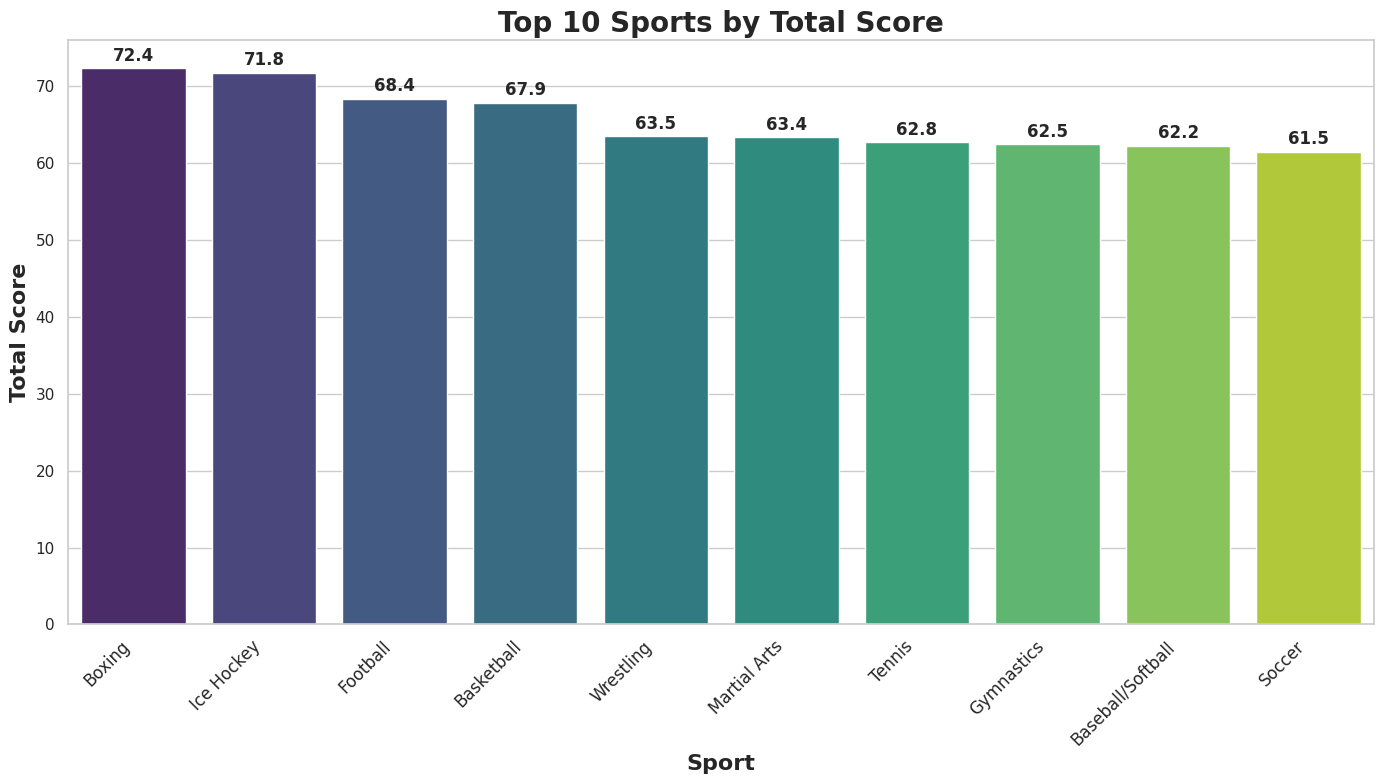

In [8]:
# Sort the data by Total score in descending order
df = df.sort_values(by='Total', ascending=False)

# Set the theme for the plot
sns.set_theme(style="whitegrid")

# Create a bar plot of the top 10 sports
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='SPORT', y='Total', data=df.head(10), palette="viridis")

# Set plot title and labels with larger font sizes for better readability
ax.set_title('Top 10 Sports by Total Score', fontsize=20, weight='bold')
ax.set_xlabel('Sport', fontsize=16, weight='bold')
ax.set_ylabel('Total Score', fontsize=16, weight='bold')

# Rotate x-tick labels for better readability
plt.xticks(rotation=45, fontsize=12, ha='right')

# Add annotations to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9),
                textcoords='offset points', fontsize=12, weight='bold')

# Display the plot
plt.tight_layout()
plt.show()

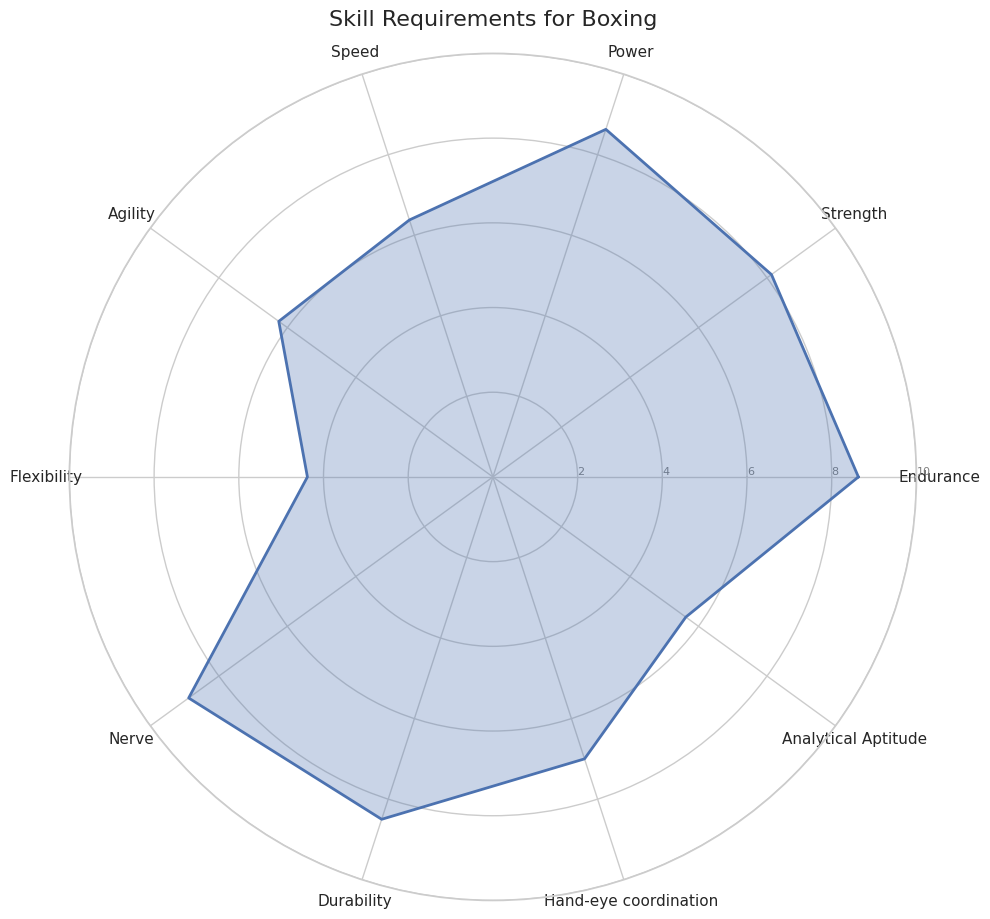

In [9]:
# Select the sport
sport = 'Boxing'
values = df.loc[df['SPORT'] == sport, ['Endurance', 'Strength', 'Power', 'Speed', 'Agility', 'Flexibility', 'Nerve', 'Durability', 'Hand-eye coordination', 'Analytical Aptitude']].values[0]

# Create a radar chart
labels = ['Endurance', 'Strength', 'Power', 'Speed', 'Agility', 'Flexibility', 'Nerve', 'Durability', 'Hand-eye coordination', 'Analytical Aptitude']
angles = [n / float(len(labels)) * 2 * pi for n in range(len(labels))]
angles += angles[:1]

plt.figure(figsize=(16, 11))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], labels)
ax.set_rlabel_position(0)
plt.yticks([2, 4, 6, 8, 10], ["2", "4", "6", "8", "10"], color="grey", size=8)
plt.ylim(0, 10)
ax.plot(angles, np.concatenate((values, [values[0]])), linewidth=2)
ax.fill(angles, np.concatenate((values, [values[0]])), alpha=0.3)
ax.set_title(f'Skill Requirements for {sport}', fontsize=16, pad=20)
plt.show()

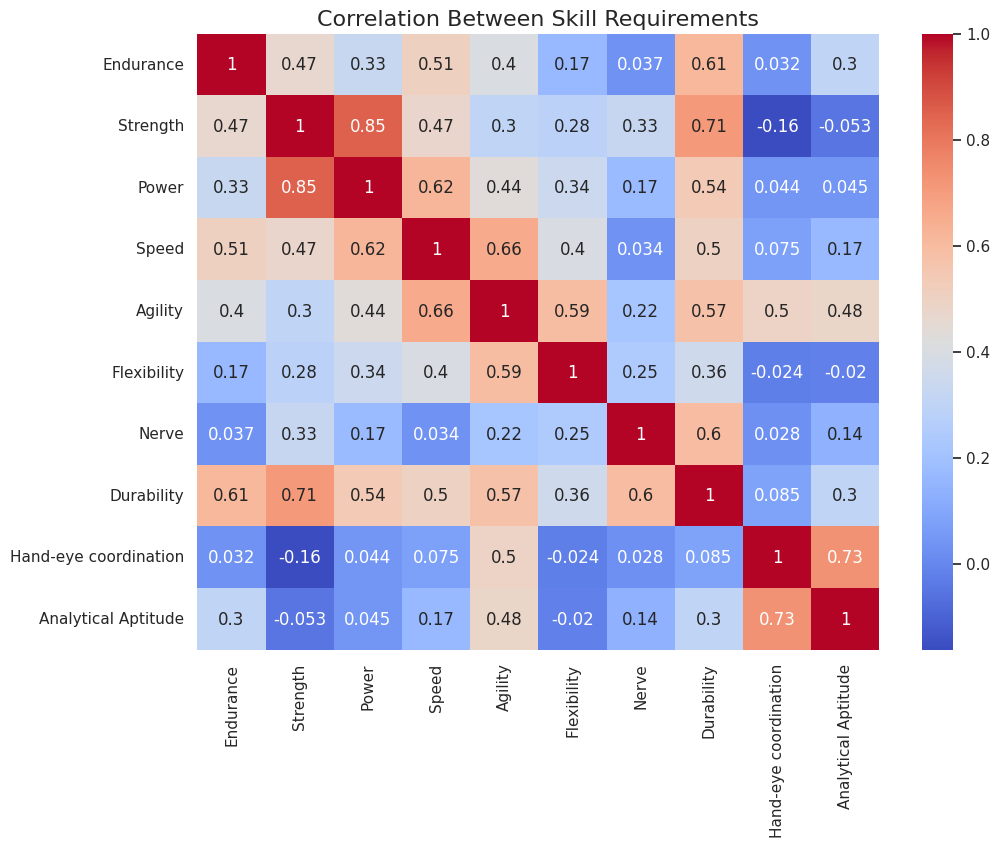

In [10]:
# Create a correlation matrix
corr = df[['Endurance', 'Strength', 'Power', 'Speed', 'Agility', 'Flexibility', 'Nerve', 'Durability', 'Hand-eye coordination', 'Analytical Aptitude']].corr()

# Create a heatmap
plt.figure(figsize=(11, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Skill Requirements', fontsize=16)
plt.show()